Saving Butterfly.png to Butterfly.png


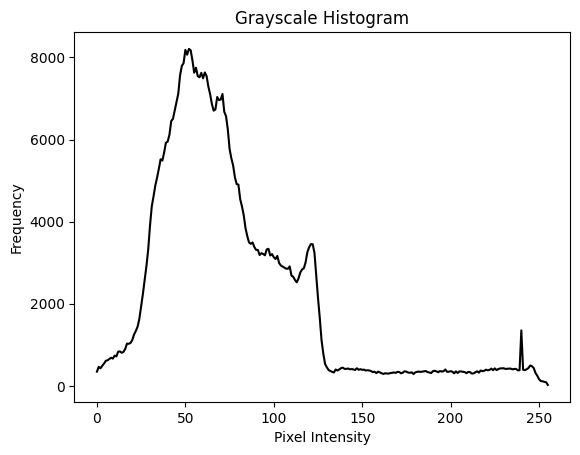

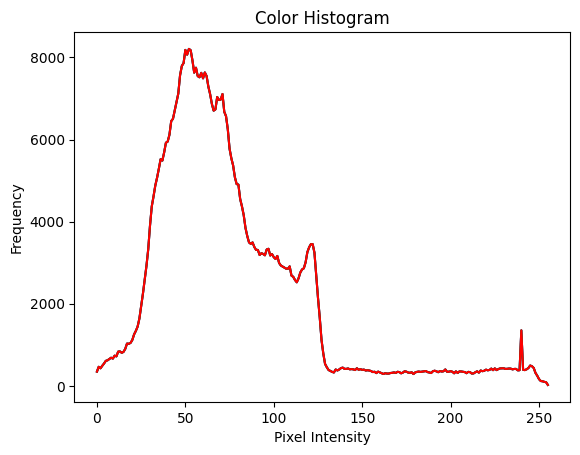

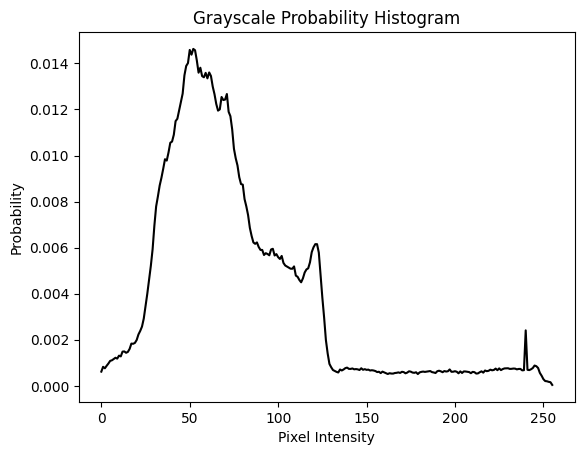

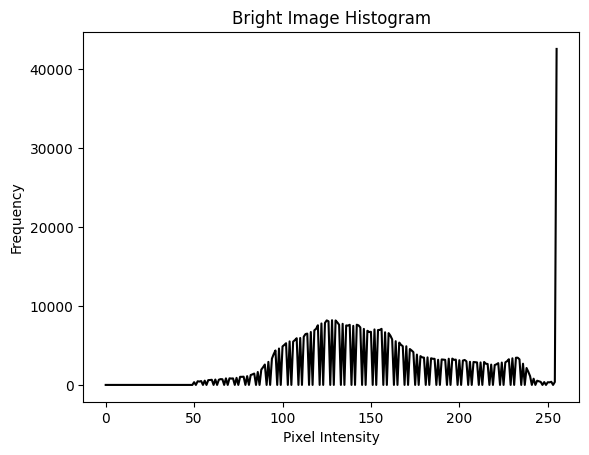

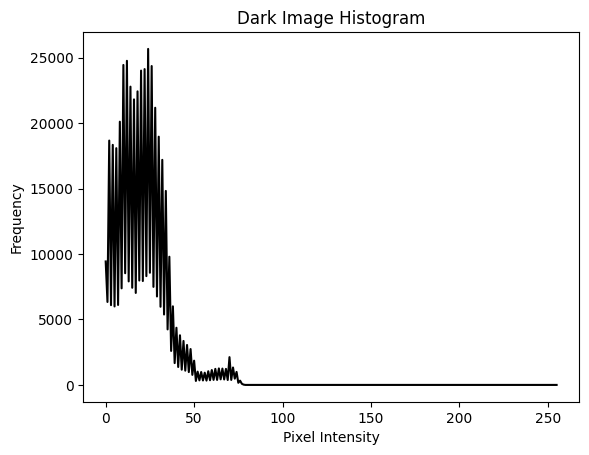

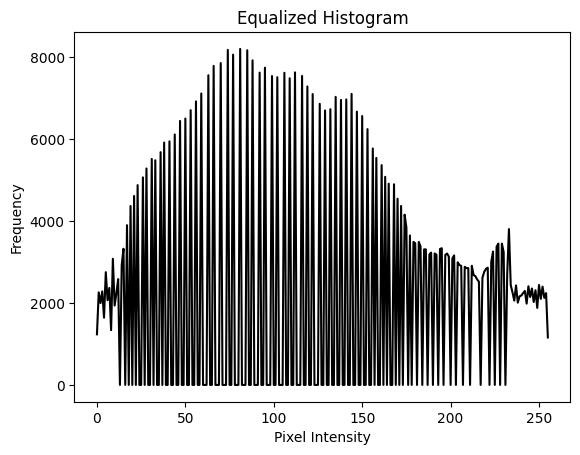

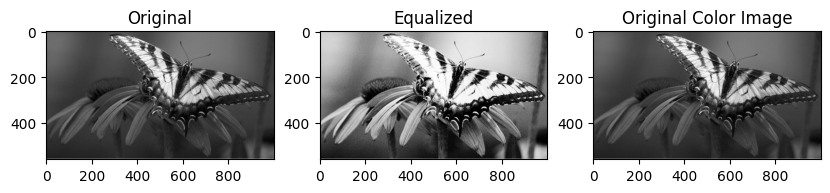

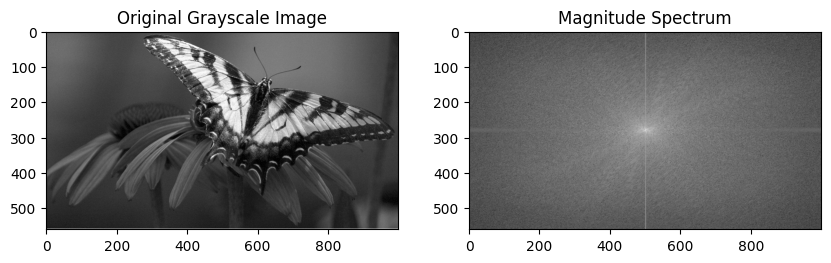

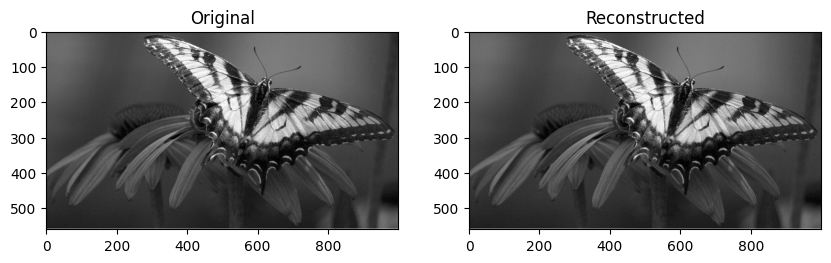

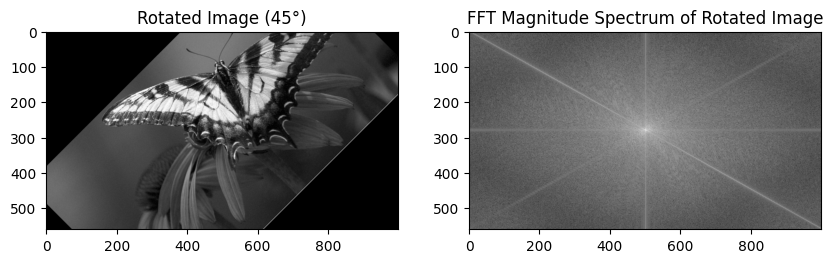

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image
from google.colab import files
uploaded = files.upload()

# Read image
image_name = list(uploaded.keys())[0]
image = cv2.imread("/content/Butterfly.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Task 1: Compute and Display Histograms

def plot_histogram(image, title, method='count'):
    if len(image.shape) == 2:  # Grayscale
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    else:  # Color
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            if method == 'probability':
                hist /= hist.sum()
            plt.plot(hist, color=col)
        plt.title(title)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency' if method == 'count' else 'Probability')
        plt.show()
        return

    if method == 'probability':
        hist /= hist.sum()

    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency' if method == 'count' else 'Probability')
    plt.show()

# Original Histograms
plot_histogram(image_gray, 'Grayscale Histogram')
plot_histogram(image, 'Color Histogram')
plot_histogram(image_gray, 'Grayscale Probability Histogram', method='probability')

# Bright and Dark Image Histogram Analysis
bright_image = cv2.convertScaleAbs(image_gray, alpha=1.5, beta=50)
dark_image = cv2.convertScaleAbs(image_gray, alpha=0.5, beta=-50)

plot_histogram(bright_image, 'Bright Image Histogram')
plot_histogram(dark_image, 'Dark Image Histogram')

# Histogram Equalization
equalized_image = cv2.equalizeHist(image_gray)
plot_histogram(equalized_image, 'Equalized Histogram')

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(image_gray, cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized')
plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Color Image')
plt.show()

# Task 2: Fourier Transform

def display_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
    return dft, dft_shift, magnitude_spectrum

# Compute FFT
original_dft, original_dft_shift, original_spectrum = display_fft(image_gray)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image_gray, cmap='gray'), plt.title('Original Grayscale Image')
plt.subplot(1,2,2), plt.imshow(original_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.show()

# Inverse FFT
idft_shift = np.fft.ifftshift(original_dft_shift)
reconstructed_image = np.fft.ifft2(idft_shift)
reconstructed_image = np.abs(reconstructed_image)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image_gray, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(reconstructed_image, cmap='gray'), plt.title('Reconstructed')
plt.show()

# Rotation Property Verification
angle = 45
(h, w) = image_gray.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image_gray, rotation_matrix, (w, h))

_, rotated_dft_shift, rotated_spectrum = display_fft(rotated_image)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(rotated_image, cmap='gray'), plt.title(f'Rotated Image ({angle}°)')
plt.subplot(1,2,2), plt.imshow(rotated_spectrum, cmap='gray'), plt.title(f'FFT Magnitude Spectrum of Rotated Image')
plt.show()
